In [9]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.constants as sp
import time
from sys import path
path.append("Chapter 9 Resources")
#from banded import *
from jupyterthemes import jtplot

In [10]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100

<b>Example 9.1</b>

(Fig. 9.1) where the box is 1 m long along each side, $V$ = 1 V, and grid spacing $a$ = 1 cm. We have 100 grid points on a side, or 101 if we count the points at the beginning and end. This program calculates the solution and makes a density plot of the result.

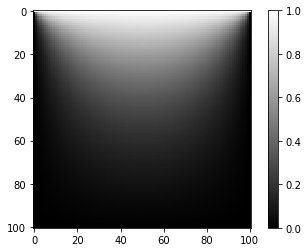

Runtime: 18.64 minutes


In [23]:
M = 100
V = 1.0
acc = 1e-6
a = 1e-2

t0 = time.time()

phi = np.zeros([ M+1 , M+1 ], float)
phi[0,:] = V
dphi = np.empty([ M+1 , M+1 ], float)

delta = 1.0
iterations = 0
maxiterations = 1e6
while delta > acc and iterations < maxiterations:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                dphi[i,j] = phi[i,j]
            else:
                dphi[i,j] = (phi[i+1,j] + phi[i-1,j] \
                             + phi[i,j+1] + phi[i,j-1])/4
    delta = np.amax(abs(phi-dphi))
    phi,dphi = dphi,phi
    iterations += 1

t1 = time.time()
    
mp.imshow(phi)
mp.gray()
mp.colorbar()
mp.show()

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))

<b>Exercise 9.1</b>

Write a program, or modify the one from Example 9.1, to solve Poisson’s equation for the system described in Example 9.2. Work in units where $\epsilon_0 = 1$ and continue the iteration until your solution for the electric potential changes by less than $10^{−6}$ V per step at every grid point.

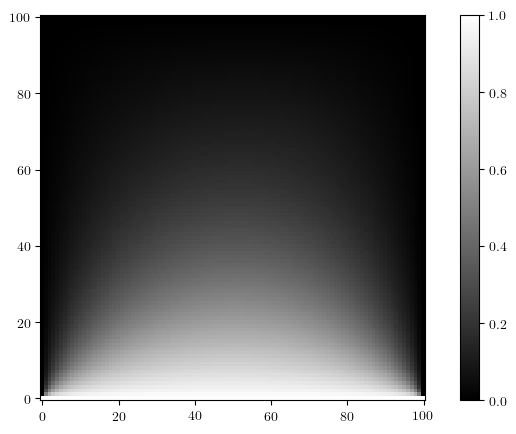

Runtime: 4.53 minutes


In [13]:
M = 100
V = 1.0
acc = 1e-6
a = 0.01

t0 = time.time()

phi = np.zeros([ M+1 , M+1 ], float)
phi[0,:] = V
dphi = np.zeros([ M+1 , M+1 ], float)

def rho(x,y):
    if x > 0.6 and x < 0.8 and y > 0.6 and y < 0.8:
        return 1
    elif x > 0.2 and x < 0.4 and y > 0.2 and y < 0.4:
        return -1
    else:
        return 0

delta = 1.0
while delta > acc:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                dphi[i,j] = phi[i,j]
            else:
                dphi[i,j] = (phi[i+1,j] + phi[i-1,j] \
                             + phi[i,j+1] + phi[i,j-1])/4 \
                + a**2/4*rho(i*a,j*a)
    delta = np.amax(abs(phi-dphi))
    phi,dphi = dphi,phi
    
t1 = time.time()
    
mp.imshow(phi, origin="lower")
mp.gray()
mp.colorbar()
mp.show()

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))

<b>Exercise 9.2:</b>

Use the Gauss–Seidel method to solve Laplace’s equation for the two-dimensional problem in Example 9.1 — a square box 1 m on each side, at voltage $V$ = 1 V along the top wall and 0 V along the other three. Use a grid of spacing $a$ = 1 cm, so that there are 100 grid points along each wall, or 101 if you count the points at both ends. Continue the iteration of the method until the value of the electric potential changes by no more than $\delta$ = 10$^{−6}$ V at any grid point on any step, then make a density plot of the final solution, similar to that shown in Fig. 9.3. Experiment with different values of $\omega$ to find which value gives the fastest solution. As mentioned above, you should find that a value around 0.9 does well. In general larger values cause the calculation to run faster, but if you choose too large a value the speed drops off and for values above 1 the calculation becomes unstable.

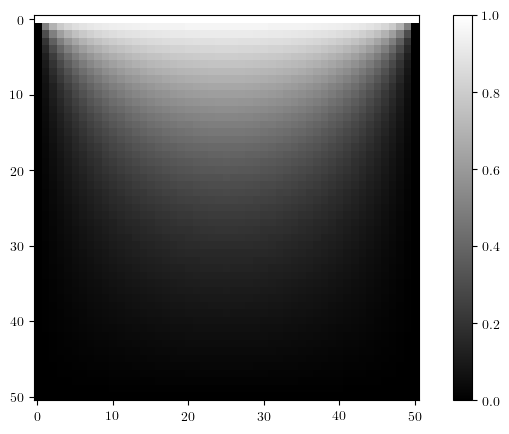

Runtime: 0.69 seconds


In [12]:
M = 50
V = 1.0
acc = 1e-6

t0 = time.time()

phi = np.zeros([ M+1 , M+1 ], float)
phi[0,:] = V
dphi = np.empty([ M+1 , M+1 ], float)

delta = 1.1
w = 0.9
while delta > acc:
    delta = 0
    for i in range(1,M):
        for j in range(1,M):
            if i==0 or i==M or j==0 or j==M:
                dphi[i,j] = phi[i,j]
            else:
                diff = (phi[i+1,j] + phi[i-1,j] \
                       + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
                phi[i,j] = phi[i,j] + (1+w)*diff
                if diff > delta:
                    delta = diff
    
t1 = time.time()

mp.imshow(phi)
mp.gray()
mp.colorbar()
mp.show()

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))

<b>Exercise 9.4: Thermal diffusion in the Earth’s crust</b>

A classic example of a diffusion problem with a time-varying boundary condition is the diffusion of heat into the crust of the Earth, as surface temperature varies with the seasons. Suppose the mean daily temperature at a particular point on the surface varies as:

\begin{equation}
    T_0(t) = A + B\sin{\frac{2\pi t}{\tau}}
\end{equation}

where $\tau$ = 365 days, $A$ = 10$^{\circ}$C and $B$ = 12$^{\circ}$C. At a depth of 20 m below the surface almost all annual temperature variation is ironed out and the temperature is, to a good approximation, a constant 11$^{\circ}$C (which is higher than the mean surface temperature of 10$^{\circ}$C — temperature increases with depth, due to heating from the hot core of the planet). The thermal diffusivity of the Earth’s crust varies somewhat from place to place, but for our purposes we will treat it as constant with value $D$ = 0.1 m$^2$/day.

Write a program, or modify one of the ones given in this chapter, to calculate the temperature profile of the crust as a function of depth up to 20 m and time up to 10 years. Start with temperature everywhere equal to 10$^{\circ}$C, except at the surface and the deepest point, choose values for the number of grid points and the time-step $h$, then run your program for the first nine simulated years, to allow it to settle down into whatever pattern it reaches. Then for the tenth and final year plot four temperature profiles taken at 3-month intervals on a single graph to illustrate how the temperature changes as a function of depth and time.

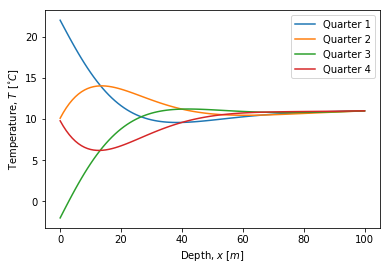

Runtime: 20.35 seconds


In [20]:
A = 10
B = 12
tau = 365
D = 0.1

def T0(t):
    return A + B*np.sin(2*np.pi*t/tau)

L = 20
N = 100
a = L/N
h = 0.01

t0 = time.time()

T = np.zeros(N+1, float)
T[1:N] = 10

def iterate(T, tmin, tmax):
    t = tmin
    c = h*D/a**2
    while t < tmax:
        T[0] = T0(t)
        T[N] = 11
        T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
        t += h
    return T

T9 = iterate(T,0,tau*9)
T9_i = T9
tmin = tau*9
for tmax in [tau*9 + i*(tau//4) for i in range(4)]:
    tmax = tmin + tau//4
    T9_i = iterate(T9_i,tmin,tmax)
    mp.plot(T9_i, label="Quarter %i" %(tmax%tau/(tau//4)))
    tmin = tmax

t1 = time.time()
    
mp.legend()
mp.xlabel("Depth, $x$ [$m$]")
mp.ylabel("Temperature, $T$ [$^{\circ}C$]")
mp.show()

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))

<b>Exercise 9.5: FTCS solution of the wave equation</b>

Consider a piano string of length $L$, initially at rest. At time $t$ = 0 the string is struck by the piano hammer a distance d from the end of the string.

The string vibrates as a result of being struck, except at the ends, $x$ = 0 and $x$ = L, where it is held fixed.

a) Write a program that uses the FTCS method to solve the complete set of simultaneous first-order equations, Eq. (9.28), for the case $v$ = 100 m/s, with the initial condition that $\phi (x)$ = 0 everywhere but the velocity $\psi (x)$ is nonzero, with profile

\begin{equation}
    \psi (x) = C\frac{x(L-x)}{L^2}e^{-\frac{(x-d)^2}{2\sigma^2}}
\end{equation}

where $L$ = 1m, $d$ = 10 cm, $C$ = 1 m/s, and $\sigma$ = 0.3 m. You will also need to choose a value for the time-step $h$. A reasonable choice is $h$ = 10$^{−6}$ s.

b) Make an animation of the motion of the piano string using the facilities provided by the visual package, which we studied in Section 3.4. There are various ways you could do this. A simple one would be to just place a small sphere at the location of each grid point on the string. A more sophisticated approach would be to use the curve object in the visual package—see the on-line documentation at www.vpython.org for details. A convenient feature of the curve object is that you can specify its set of $x$ positions and $y$ positions separately as arrays. In this exercise the $x$ positions only need to specified once, since they never change, while the $y$ positions will need to be specified anew each time
you take a time-step. Also, since the vertical displacement of the string is much less than its horizontal length, you will probably need to multiply the vertical displacement by a fairly large factor to make it visible on the screen. Allow your animation to run for some time, until numerical instabilities start to appear.

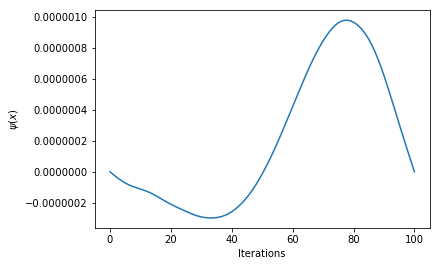

Runtime: 2.97 seconds


In [38]:
h = 1e-6
L = 1
v = 100
d = 0.1
C = 1
sigma = 0.3
N = 100
a = L/N

def phi0(x):
    return C*x*(L-x)/L/L*np.exp(-(x-d)**2/2/sigma**2)

t0 = time.time()

psi = np.zeros(N+1, float)
x = np.linspace(0,L,N+1)
phi = phi0(x)
t = 0
t_end = 50e-3/100

def iterate(psi, phi, dt=50e-3):
    iterations = int(dt/h)
    for i in range(iterations):
        psi[1:N] += h*phi[1:N]
        phi[1:N] += h*v**2/a**2*(psi[2:N+1] + psi[0:N-1] \
                                 - 2*psi[1:N])
        #t += h
    return psi, phi

psi,phi = iterate(psi,phi)

t1 = time.time()

plot(psi)
ylabel("$\psi (x)$")
xlabel("Iterations")
show()

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))

<b>Exercise 9.8: The Schrodinger equation and the Crank–Nicolson method</b>

Perhaps themost important partial differential equation, at least for physicists, is the Schrodinger equation. This exercise uses the Crank–Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time. The following exercise, Exercise 9.9, solves the same problem again, but using the spectral method.

We will look at the Schrodinger equation in one dimension. The techniques for calculating solutions in two or three dimensions are basically the same as for one dimension, but the calculations take much longer on the computer, so in the interests of speed we’ll stick with one dimension. In one dimension the Schrodinger equation for a particle of mass $M$ with no potential energy reads

\begin{equation}
    -\frac{\hbar^2}{2M}\frac{\partial^2\psi}{\partial x^2} = i\hbar\frac{\partial\psi}{\partial t}
\end{equation}

For simplicity, let’s put our particle in a box with impenetrable walls, so that we only have to solve the equation in a finite-sized space. The box forces the wavefunction $\psi$ to be zero at the walls, which we’ll put at $x$ = 0 and $x$ = L.

a) Write a program to perform a single step of the Crank–Nicolson method for this electron, calculating the vector $y(t)$ of values of the wavefunction, given the initial wavefunction above and using $N$ = 1000 spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $y(0)$ at $t$ = 0, you will have to multiply by the matrix $B$ to get a vector $v = B\psi$. Because of the tridiagonal form of $B$, this is fairly simple. The $i$th component of $v$ is given by

\begin{equation}
    v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1})
\end{equation}

You will also have to choose a value for the time-step $h$. A reasonable choice is $h$ = 10$^{−18}$ s.

Second you will have to solve the linear system $Ax = v$ for $x$, which gives you the new value of $y$. You could do this using a standard linear equation solver like the function solve in numpy.linalg, but since the matrix $A$ is tridiagonal a better approach would be to use the fast solver for banded matrices given in Appendix E, which can be imported from the file banded.py (which you can find in the on-line resources). Note that although the wavefunction of a particle in principle has a complex value, in this case the wavefunction is always real—all the coefficients in the equations above are real numbers so if, as here, the wavefunction starts off real, then it remains real. Thus you do not need to use a complex array to represent the vector $y$. A real one will do the job.

Third, once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $A$ is independent of time, so it doesn’t change from one step to another. You can set up the matrix just once and then keep on reusing it for every step.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Runtime: 2.34 seconds


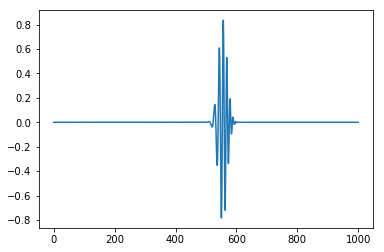

In [39]:
h = 1e-18
L = 1e-8
N = 1000
a = L/N
M = sp.electron_mass

t0 = time.time()

a1 = 1 + h*sp.hbar/2/M/a/a*1j
a2 = -h*sp.hbar/4/M/a/a*1j
b1 = 1 - h*sp.hbar/2/M/a/a*1j
b2 = h*sp.hbar/4/M/a/a*1j

psi = np.zeros(N+1, complex)

def psi0(x):
    x0 = L/2
    sigma = 1e-10
    k = 5e10
    return np.exp(-(x-x0)**2/2/sigma**2)*np.exp(1j*k*x)

x = np.linspace(0,L,N+1)
psi[:] = psi0(x)
psi[[0,N]] = 0

A = np.empty((3,N), complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

for i in range(100):
    v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi[1:N] = banded(A,v,1,1)
    
t1 = time.time()
    
mp.plot(psi)

t_tot = t1-t0
if t_tot < 60:
    print("Runtime: %.2f seconds" %t_tot)
else:
    print("Runtime: %.2f minutes" %(t_tot/60))